# Estadística Aplicada

Actividad 5

Cecilia Sarahí Gutiérrez Padilla 1953437 Gpo 43

##### 3. En el enlace se encuentra la base de datos “quiebra.csv” que midelos años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra),  la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada (no se observó la quiebra en el periodo de observación). La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa. Responda en una notebook de Python cada inciso. https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv

In [1]:
## Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## Librerías especializadas
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test

In [9]:
## Importar datos
Quebrar= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

a) Ajuste un modelo de supervivencia exponencial 

In [10]:
## Ajustamos el modelo Exponencial
mexp= ExponentialFitter().fit(Quebrar['tiempo'], Quebrar['quebrar'])

b) Grafique la función de riesgo exponencial

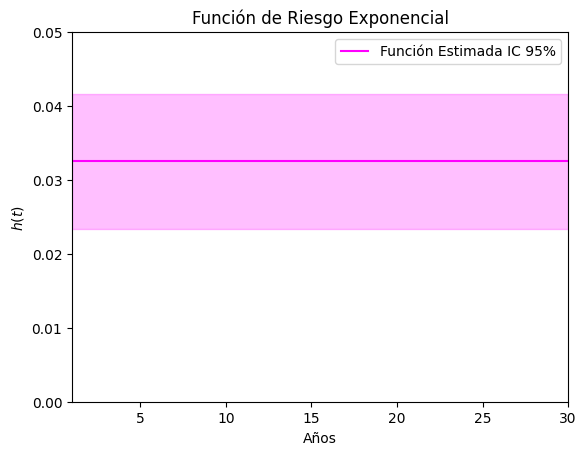

In [14]:
## Gráfica para h(t)
mexp.plot_hazard(label='Función Estimada IC 95%',color='magenta')
plt.title('Función de Riesgo Exponencial')
plt.xlim(1, 30)
plt.ylim(0, 0.05)
plt.ylabel('$h(t)$')
plt.xlabel('Años')
plt.show()

c) ¿Cuáles el riesgo de que una empresa quiebre según la función exponencial?

In [16]:
## Riesgo de que la empresa quiebre
mexp.hazard_.head(5)

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498


La probabilidad de que una empresa quiebre según la función exponencial es del 3.2498%.

##### 4. Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

a) Ajuste un modelo Weibull de supervivencia

In [19]:
## Ajustamos el Modelo Weibull de supervivencia
mweib = WeibullFitter().fit(Quebrar['tiempo'], Quebrar['quebrar'])

b) Grafique la función de riesgo

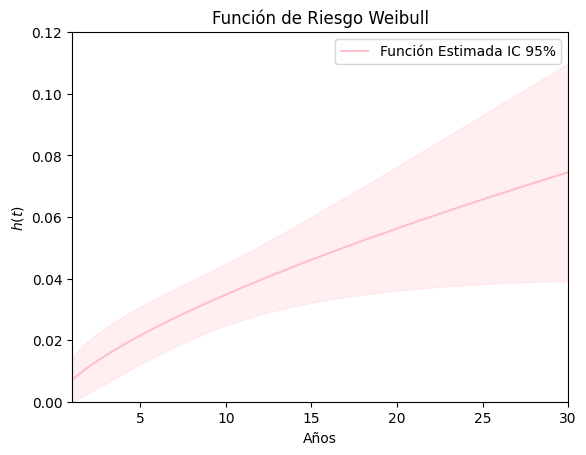

In [23]:
## Gráfica para h(t)
mweib.plot_hazard(label='Función Estimada IC 95%', color= 'pink')
plt.title('Función de Riesgo Weibull')
plt.xlim(1, 30)
plt.ylim(0, 0.12)
plt.ylabel('$h(t)$')
plt.xlabel('Años')
plt.show()

c) ¿Qué forma tiene la función de riesgo? y ¿qué significa?

In [24]:
mweib.rho_.round(2)

1.69

El valor de Gamma en la función exponencial es 1.69, por lo que se satisface $\gamma > 1$. En consecuencia, la función de riesgo Weibull muestra un comportamiento creciente, indicando que el riesgo aumenta a medida que transcurre el tiempo.

##### 5. Con  la  base  de  datos  del  punto  3  responda  en  la  misma  notebook  lo siguiente:

a) Ajuste un modelo Log-Normal

In [25]:
## Ajustamos el modelo Log-Normal
mlogn = LogNormalFitter().fit(Quebrar['tiempo'], Quebrar['quebrar'])

b) Grafique la función de riesgo

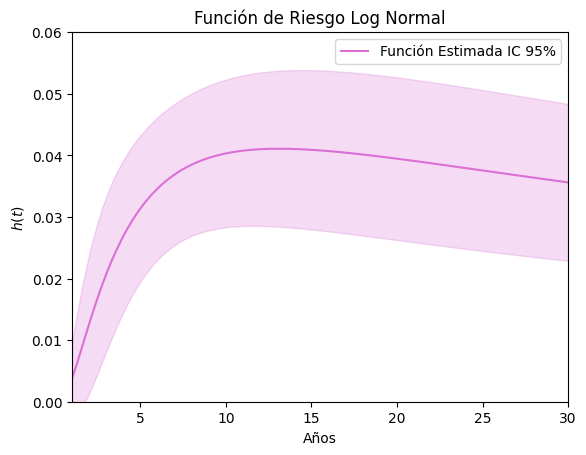

In [28]:
## Gráfica de h(t)
mlogn.plot_hazard(label='Función Estimada IC 95%', color= 'orchid')
plt.title('Función de Riesgo Log Normal')
plt.xlim(1, 30)
plt.ylim(0, 0.06)
plt.ylabel('$h(t)$')
plt.xlabel('Años')
plt.show()

c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

In [31]:
mlogn.hazard_.iloc[35:45]

,LogNormal_estimate
11.252525,0.040834
11.545455,0.040907
11.838384,0.040966
12.131313,0.041010
12.424242,0.041042
12.717172,0.041061
13.010101,0.041069
13.303030,0.041067
13.595960,0.041056
13.888889,0.041036


El riesgo aumenta desde el tiempo 1 hasta el 13.010101 y luego disminuye desde el tiempo 13.010101 hasta el 30.

##### 6. Utilizando el estimador de Kaplan-Meier realice una notebook en Python para responder lo siguiente:

a) Estime la función de supervivencia y la mediana de tiempo de supervivencia y diga que significa.

In [29]:
## Estimamos el modelo de Kaplan-Meier
mkap = KaplanMeierFitter().fit(Quebrar['tiempo'], Quebrar['quebrar'])

In [30]:
## Función de supervivencia
mkap.survival_function_.head()

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400


La función de supervivencia indica la probabilidad de que el evento no haya ocurrido hasta un punto dado en el tiempo, lo que implica una disminución de esta probabilidad a medida que transcurre el tiempo. Se evidencia que con el paso del tiempo, la probabilidad de que la empresa quiebre aumenta.

In [32]:
mkap.median_survival_time_

23.0

La mediana de tiempo de supervivencia indica el momento en el que se anticipa que el 50% de los eventos habrán tenido lugar. En otras palabras, representa el punto en el tiempo en el que se espera que la mitad de las empresas hayan quebrado y la otra mitad aún esté operativa. Por lo que se prevé que la mitad de las empresas habrán quebrado a los 23 años.

b) Estime la función de supervivencia por Kaplan-meier para hombres y mujeres y grafique con .plot_survival_function(ci_show=False) y diga si las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [35]:
## Separamos a las mujeres de los hombres, si son mujeres será igual a 0 y si son hombres será igual a 1
hom = Quebrar.query('mujer==0')
muj = Quebrar.query('mujer==1')

In [36]:
## Funciones de supervivencia para hombres y mujeres
mkap_h = KaplanMeierFitter().fit(hom['tiempo'], hom['quebrar'])
mkap_m = KaplanMeierFitter().fit(muj['tiempo'], muj['quebrar'])

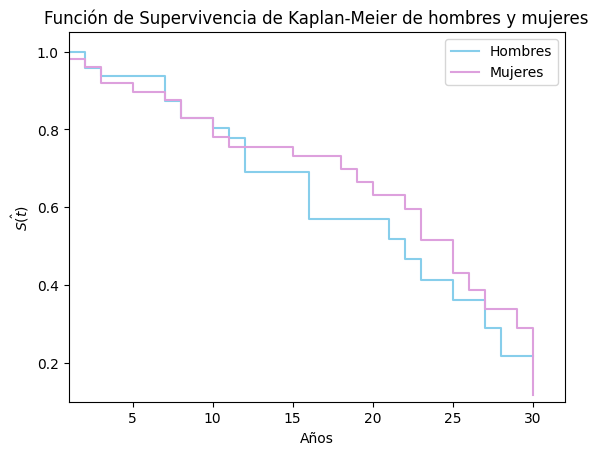

In [40]:
## Graficamos la función de supervivencia para los hombres y mujeres
mkap_h.plot_survival_function(label='Hombres', color='skyblue', ci_show=False)
mkap_m.plot_survival_function(label='Mujeres', color='plum', ci_show=False)
plt.title('Función de Supervivencia de Kaplan-Meier de hombres y mujeres')
plt.xlim(1, 32)
plt.ylim(0.1,1.05)
plt.ylabel('$\hat{S(t)}$')
plt.xlabel('Años')
plt.show()

Las diferencias en el tiempo de quiebra entre empresas dirigidas por hombres y mujeres son mínimas en general. Sin embargo, a partir de los 10 años en adelante, las empresas lideradas por hombres muestran una supervivencia más baja que las empresas dirigidas por mujeres, lo que sugiere un mayor riesgo de quiebra para la de los hombres en ese período.

c) El profesor cree que las empresas fundadas por hombres quiebran más rápido, refute o confirme con evidencia estadística tal afirmación (pruebas de hipótesis, graficas, tablas etc.)

Prueba de hipótesis (Log Rank Test)

$Ho: S(1)=S(2)$ Funciones de Supervivencia iguales.

$Ha: S(1)\neq S(2)$ Funciones de Supervivencia distintas.

In [42]:
LogRaT = logrank_test(hom['tiempo'], muj['tiempo'], hom['quebrar'], muj['quebrar'])
LogRaT.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75>

In [ ]:
LRT.p_value.round(2)

0.59

Dado que el valor p ($p$-value) es mayor o igual a nuestro nivel de significancia ($\alpha$), no rechazamos la hipótesis nula (Ho), lo que indica que las funciones de supervivencia son similares. En consecuencia, no encontramos diferencias relevantes en la velocidad de quiebra entre las empresas fundadas por hombres y mujeres. Esto implica que las empresas fundadas por hombres no tienen una tasa de quiebra más rápida que las empresas fundadas por mujeres.

In [46]:
mkap_h.median_survival_time_

22.0

In [47]:
mkap_m.median_survival_time_

25.0

La mediana de tiempo de supervivencia es similar para empresas fundadas por hombres (22 años) y por mujeres (25 años), lo cual coincide con el valor calculado a través del modelo Kaplan-Meier (23 años). Esto sugiere que no hay diferencias significativas en la velocidad de quiebra entre las empresas dirigidas por ambos géneros.